In [64]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('heart disease classification dataset .csv')


In [65]:
print(data.shape)
print(data.isnull().sum())
data.dropna(inplace = True)
print(data.shape)

(303, 15)
Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64
(293, 15)


In [66]:
data

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
5,5,57,male,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,296,63,female,0,124.0,197.0,0,1,136.0,1,0.0,1,0,2,no
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no


In [67]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn import preprocessing


encoder = preprocessing.LabelEncoder()
encoder.fit(data['target'])
target = encoder.transform(data['target'])


target = target.reshape(-1, 1)


one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(target)
one_hot_target = one_hot_encoder.transform(target)
print(one_hot_target.toarray())
print(one_hot_target.shape)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [68]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['sex'])
encoded_sex = tokenizer.texts_to_sequences(data['sex'])

In [69]:
max_len = max(len(item) for item in encoded_sex)
print('최대 길이 :',max_len)

최대 길이 : 1


In [70]:
from keras.utils import pad_sequences
max_len = 1
encoded_overview = pad_sequences(encoded_sex, maxlen=max_len)

In [71]:
encoded_sex

[[1],
 [1],
 [2],
 [1],
 [1],
 [2],
 [1],
 [1],
 [1],
 [1],
 [2],
 [1],
 [1],
 [2],
 [2],
 [2],
 [1],
 [2],
 [1],
 [1],
 [1],
 [1],
 [1],
 [2],
 [1],
 [1],
 [2],
 [1],
 [2],
 [1],
 [1],
 [1],
 [1],
 [2],
 [2],
 [1],
 [2],
 [2],
 [2],
 [1],
 [1],
 [2],
 [1],
 [1],
 [1],
 [1],
 [2],
 [2],
 [1],
 [1],
 [2],
 [2],
 [1],
 [1],
 [1],
 [1],
 [2],
 [2],
 [1],
 [1],
 [1],
 [1],
 [2],
 [1],
 [2],
 [1],
 [2],
 [1],
 [1],
 [1],
 [1],
 [2],
 [2],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [2],
 [1],
 [2],
 [2],
 [1],
 [1],
 [2],
 [2],
 [1],
 [1],
 [2],
 [2],
 [1],
 [2],
 [1],
 [1],
 [1],
 [1],
 [1],
 [2],
 [1],
 [1],
 [2],
 [1],
 [2],
 [2],
 [2],
 [2],
 [1],
 [2],
 [1],
 [1],
 [2],
 [1],
 [1],
 [2],
 [2],
 [2],
 [1],
 [2],
 [2],
 [2],
 [2],
 [1],
 [2],
 [2],
 [2],
 [2],
 [2],
 [1],
 [1],
 [2],
 [2],
 [1],
 [1],
 [1],
 [2],
 [1],
 [2],
 [2],
 [2],
 [1],
 [2],
 [2],
 [1],
 [1],
 [1],
 [2],
 [1],
 [2],
 [2],
 [2],
 [1],
 [1],
 [1],
 [1],
 [1],
 [2],
 [1],
 [1],
 [1],
 [1],
 [1],
 [2],
 [1],
 [1],
 [1],
 [1]

In [72]:
target

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [73]:
data['sex'] = np.array(encoded_sex)

In [74]:
train = data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]


In [75]:
train.shape

(293, 13)

In [76]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)

X = poly.fit_transform(train)

In [77]:
train.shape

(293, 13)

In [78]:
target.shape

(293, 1)

In [79]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.1, shuffle=True, stratify=target, random_state=3)


In [81]:
y=target

In [89]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=3)

In [94]:
from keras import models
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout

dropout_ratio = 0.3

model = models.Sequential()
model.add(layers.Dense(13, activation = 'relu'))
model.add(layers.Dense(6, activation = 'relu'))
model.add(layers.Dense(6, activation = 'relu'))
model.add(Dropout(dropout_ratio))
model.add(layers.Dense(1, activation='softmax'))


es = EarlyStopping(monitor='val_loss', patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=2000,validation_data=(x_val, y_val), batch_size=40, callbacks = [es, mc])

Epoch 1/2000
1/6 [====>.........................] - ETA: 8s - loss: 106877.1719 - accuracy: 0.6750

6/6 [==============================] - 2s 36ms/step - loss: 51426.3906 - accuracy: 0.5470 - val_loss: 5259.3901 - val_accuracy: 0.5424
Epoch 2/2000
1/6 [====>.........................] - ETA: 0s - loss: 3515.8110 - accuracy: 0.5500

6/6 [==============================] - 0s 7ms/step - loss: 805.1991 - accuracy: 0.5470 - val_loss: 2566.6404 - val_accuracy: 0.5424
Epoch 3/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6582 - accuracy: 0.5000

6/6 [==============================] - 0s 8ms/step - loss: 57.3296 - accuracy: 0.5470 - val_loss: 1063.6986 - val_accuracy: 0.5424
Epoch 4/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6766 - accuracy: 0.5750

6/6 [==============================] - 0s 7ms/step - loss: 0.6669 - accuracy: 0.5470 - val_loss: 1063.6985 - val_accuracy: 0.5424
Epoch 5/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6934 - accuracy: 0.5250

6/6 [==============================] - 0s 7ms/step - loss: 0.6608 - accuracy: 0.5470 - val_loss: 1063.6985 - val_accuracy: 0.5424
Epoch 6/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6588 - accuracy: 0.5500

6/6 [==============================] - 0s 7ms/step - loss: 0.6578 - accuracy: 0.5470 - val_loss: 1063.6985 - val_accuracy: 0.5424
Epoch 7/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6755 - accuracy: 0.4750

6/6 [==============================] - 0s 8ms/step - loss: 0.6697 - accuracy: 0.5470 - val_loss: 1063.6984 - val_accuracy: 0.5424
Epoch 8/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6754 - accuracy: 0.4250

6/6 [==============================] - 0s 8ms/step - loss: 0.6577 - accuracy: 0.5470 - val_loss: 1063.6985 - val_accuracy: 0.5424
Epoch 9/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6932 - accuracy: 0.5250

6/6 [==============================] - 0s 7ms/step - loss: 0.6636 - accuracy: 0.5470 - val_loss: 1063.6984 - val_accuracy: 0.5424
Epoch 10/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6760 - accuracy: 0.6500

6/6 [==============================] - 0s 11ms/step - loss: 1.5637 - accuracy: 0.5470 - val_loss: 907.0228 - val_accuracy: 0.5424
Epoch 11/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6758 - accuracy: 0.5000

6/6 [==============================] - 0s 7ms/step - loss: 0.6694 - accuracy: 0.5470 - val_loss: 907.0227 - val_accuracy: 0.5424
Epoch 12/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6584 - accuracy: 0.5500

6/6 [==============================] - 0s 8ms/step - loss: 0.6634 - accuracy: 0.5470 - val_loss: 907.0226 - val_accuracy: 0.5424
Epoch 13/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6758 - accuracy: 0.5250

6/6 [==============================] - 0s 7ms/step - loss: 0.6634 - accuracy: 0.5470 - val_loss: 907.0225 - val_accuracy: 0.5424
Epoch 14/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6757 - accuracy: 0.5250

6/6 [==============================] - 0s 7ms/step - loss: 0.6663 - accuracy: 0.5470 - val_loss: 907.0226 - val_accuracy: 0.5424
Epoch 15/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6571 - accuracy: 0.6750

6/6 [==============================] - 0s 8ms/step - loss: 0.6633 - accuracy: 0.5470 - val_loss: 907.0225 - val_accuracy: 0.5424
Epoch 16/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6752 - accuracy: 0.5750

6/6 [==============================] - 0s 9ms/step - loss: 0.6662 - accuracy: 0.5470 - val_loss: 907.0225 - val_accuracy: 0.5424
Epoch 17/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6938 - accuracy: 0.4500

6/6 [==============================] - 0s 7ms/step - loss: 0.6632 - accuracy: 0.5470 - val_loss: 907.0224 - val_accuracy: 0.5424
Epoch 18/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6406 - accuracy: 0.5750

6/6 [==============================] - 0s 7ms/step - loss: 0.6719 - accuracy: 0.5470 - val_loss: 907.0223 - val_accuracy: 0.5424
Epoch 19/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6765 - accuracy: 0.4750

6/6 [==============================] - 0s 8ms/step - loss: 0.6573 - accuracy: 0.5470 - val_loss: 907.0223 - val_accuracy: 0.5424
Epoch 20/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6751 - accuracy: 0.5500

6/6 [==============================] - 0s 7ms/step - loss: 0.6631 - accuracy: 0.5470 - val_loss: 907.0222 - val_accuracy: 0.5424
Epoch 21/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6927 - accuracy: 0.5250

6/6 [==============================] - 0s 11ms/step - loss: 0.6572 - accuracy: 0.5470 - val_loss: 907.0222 - val_accuracy: 0.5424
Epoch 22/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6397 - accuracy: 0.6000

6/6 [==============================] - 0s 7ms/step - loss: 0.6746 - accuracy: 0.5470 - val_loss: 907.0222 - val_accuracy: 0.5424
Epoch 23/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6762 - accuracy: 0.5000

6/6 [==============================] - 0s 7ms/step - loss: 0.6659 - accuracy: 0.5470 - val_loss: 907.0221 - val_accuracy: 0.5424
Epoch 24/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6579 - accuracy: 0.5500

6/6 [==============================] - 0s 8ms/step - loss: 7.7103 - accuracy: 0.5470 - val_loss: 0.6575 - val_accuracy: 0.5424
Epoch 25/2000
1/6 [====>.........................] - ETA: 0s - loss: 324.8885 - accuracy: 0.5750

6/6 [==============================] - 0s 7ms/step - loss: 56.1073 - accuracy: 0.5470 - val_loss: 0.6919 - val_accuracy: 0.5424
Epoch 26/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6740 - accuracy: 0.5750

6/6 [==============================] - 0s 8ms/step - loss: 0.6889 - accuracy: 0.5470 - val_loss: 0.6919 - val_accuracy: 0.5424
Epoch 27/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6924 - accuracy: 0.5250

6/6 [==============================] - 0s 12ms/step - loss: 0.6888 - accuracy: 0.5470 - val_loss: 0.6918 - val_accuracy: 0.5424
Epoch 28/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6915 - accuracy: 0.5500

6/6 [==============================] - 0s 7ms/step - loss: 0.6887 - accuracy: 0.5470 - val_loss: 0.6917 - val_accuracy: 0.5424
Epoch 29/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6933 - accuracy: 0.5000

6/6 [==============================] - 0s 8ms/step - loss: 0.6886 - accuracy: 0.5470 - val_loss: 0.6916 - val_accuracy: 0.5424
Epoch 30/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6954 - accuracy: 0.4500

6/6 [==============================] - 0s 8ms/step - loss: 0.6886 - accuracy: 0.5470 - val_loss: 0.6915 - val_accuracy: 0.5424
Epoch 31/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6923 - accuracy: 0.5250

6/6 [==============================] - 0s 7ms/step - loss: 0.6885 - accuracy: 0.5470 - val_loss: 0.6915 - val_accuracy: 0.5424
Epoch 32/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6766 - accuracy: 0.5000

6/6 [==============================] - 0s 7ms/step - loss: 0.6884 - accuracy: 0.5470 - val_loss: 0.6914 - val_accuracy: 0.5424
Epoch 33/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6755 - accuracy: 0.5250

6/6 [==============================] - 0s 9ms/step - loss: 0.6883 - accuracy: 0.5470 - val_loss: 0.6913 - val_accuracy: 0.5424
Epoch 34/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6884 - accuracy: 0.6000

6/6 [==============================] - 0s 10ms/step - loss: 0.6882 - accuracy: 0.5470 - val_loss: 0.6912 - val_accuracy: 0.5424
Epoch 35/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6822 - accuracy: 0.4000

6/6 [==============================] - 0s 8ms/step - loss: 0.6882 - accuracy: 0.5470 - val_loss: 0.6912 - val_accuracy: 0.5424
Epoch 36/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6921 - accuracy: 0.5250

6/6 [==============================] - 0s 9ms/step - loss: 0.6881 - accuracy: 0.5470 - val_loss: 0.6911 - val_accuracy: 0.5424
Epoch 37/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6864 - accuracy: 0.6250

6/6 [==============================] - 0s 9ms/step - loss: 0.6880 - accuracy: 0.5470 - val_loss: 0.6911 - val_accuracy: 0.5424
Epoch 38/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6980 - accuracy: 0.4250

6/6 [==============================] - 0s 7ms/step - loss: 0.6880 - accuracy: 0.5470 - val_loss: 0.6910 - val_accuracy: 0.5424
Epoch 39/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5500

6/6 [==============================] - 0s 7ms/step - loss: 0.6879 - accuracy: 0.5470 - val_loss: 0.6910 - val_accuracy: 0.5424
Epoch 40/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6692 - accuracy: 0.6250

6/6 [==============================] - 0s 7ms/step - loss: 0.6878 - accuracy: 0.5470 - val_loss: 0.6909 - val_accuracy: 0.5424
Epoch 41/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6937 - accuracy: 0.5000

6/6 [==============================] - 0s 8ms/step - loss: 0.6879 - accuracy: 0.5470 - val_loss: 0.6909 - val_accuracy: 0.5424
Epoch 42/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6904 - accuracy: 0.5500

6/6 [==============================] - 0s 8ms/step - loss: 0.6878 - accuracy: 0.5470 - val_loss: 0.6908 - val_accuracy: 0.5424
Epoch 43/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6903 - accuracy: 0.5500

6/6 [==============================] - 0s 7ms/step - loss: 0.6877 - accuracy: 0.5470 - val_loss: 0.6908 - val_accuracy: 0.5424
Epoch 44/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.6885 - accuracy: 0.5750

6/6 [==============================] - 0s 7ms/step - loss: 0.6876 - accuracy: 0.5470 - val_loss: 0.6907 - val_accuracy: 0.5424


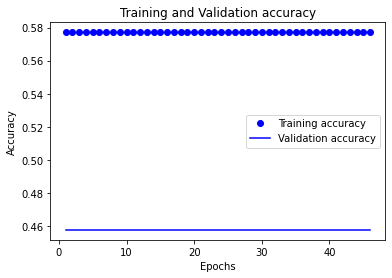

In [93]:
history_dic = history.history

acc = history_dic['accuracy']
val_acc = history_dic['val_accuracy']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()